In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from ukbb_cardiac.common.cardiac_utils import *
import pandas as pd

ModuleNotFoundError: No module named 'vtk'

TODO: Find out the time between frames in MRI

In [3]:
def FirstDeriv(WT):
    h = 1
    df = (WT[1:]-WT[:-1]) / h
    return df

def SecondDeriv(WT):
    h = 1
    ddf = (WT[2:] - 2*WT[1:-1] + WT[:-2]) / h**2
    return ddf

In [36]:
def plotWT(WT,ES_ID):
    fig,ax = plt.subplots(3)
    Y = [WT, FirstDeriv(WT), SecondDeriv(WT)]
    labels = ["WT","WT'","WT''"]
    for i in range(3):
        X = np.arange(len(Y[i]))
        ax[i].plot(X[:ES_ID],Y[i][:ES_ID],'b')
        ax[i].plot(X[ES_ID-1:],Y[i][ES_ID-1:],'r')
        ax[i].grid(True)
        
        if(i != 3):
            ax[i].set_xticklabels([])
            ax[i].legend(["systole",'diastole'])
            
        ax[i].set_title(labels[i])
        
    plt.subplots_adjust(top=2) 
    fig.show()

**get wall thickness**

In [29]:
%%capture
WTs = []
WTs.append(np.array(evaluate_wall_thickness_per_frame("ukbb_cardiac/demo_image/1000012/seg_sa.nii.gz")))
WTs.append(np.array(evaluate_wall_thickness_per_frame("ukbb_cardiac/demo_image/1003167/seg_sa.nii.gz")))
WTs.append(np.array(evaluate_wall_thickness_per_frame("ukbb_cardiac/demo_image/6023555/seg_sa.nii.gz")))

**get frame where systole ends**

In [30]:
ES_Ids = []
with open("ukbb_cardiac/demo_image/1000012/ES_ID.txt",'r') as f:
    ES_Ids.append(int(f.read()))
with open("ukbb_cardiac/demo_image/1003167/ES_ID.txt",'r') as f:
    ES_Ids.append(int(f.read()))
with open("ukbb_cardiac/demo_image/6023555/ES_ID.txt",'r') as f:
    ES_Ids.append(int(f.read()))

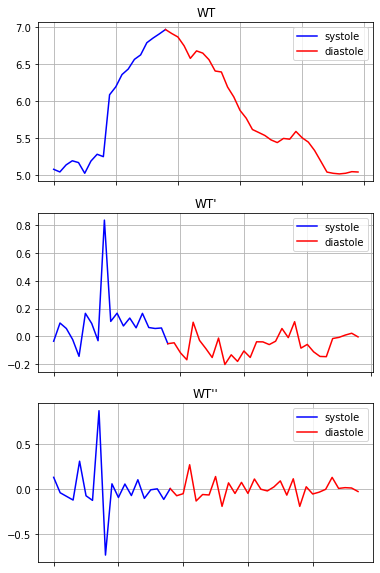

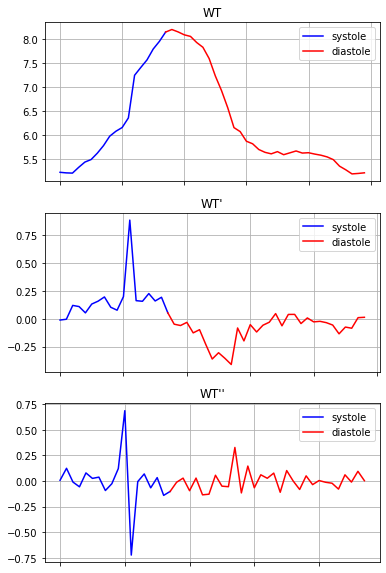

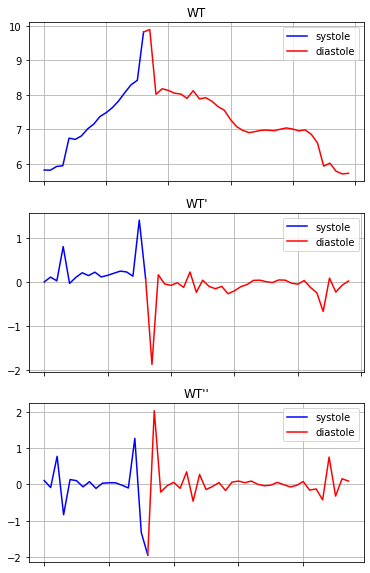

In [35]:
for i,j in zip(WTs,ES_Ids):
    plotWT(i,j)

## Now we will plot max wall thickness through time

In [37]:
%%capture
WTs = []
WTs.append(np.array(evaluate_wall_thickness_per_frame("ukbb_cardiac/demo_image/1000012/seg_sa.nii.gz",return_max=True)))
WTs.append(np.array(evaluate_wall_thickness_per_frame("ukbb_cardiac/demo_image/1003167/seg_sa.nii.gz",return_max=True)))
WTs.append(np.array(evaluate_wall_thickness_per_frame("ukbb_cardiac/demo_image/6023555/seg_sa.nii.gz",return_max=True)))

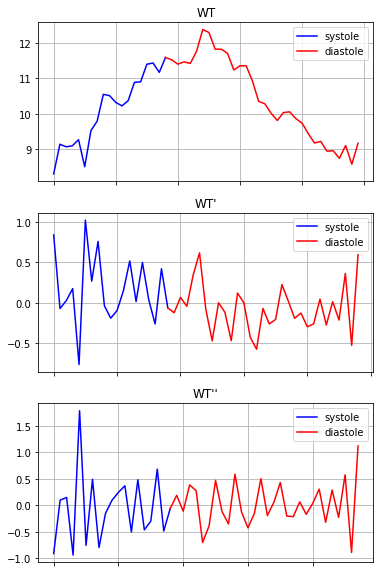

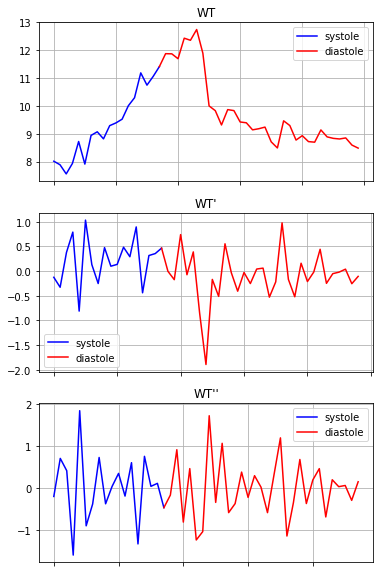

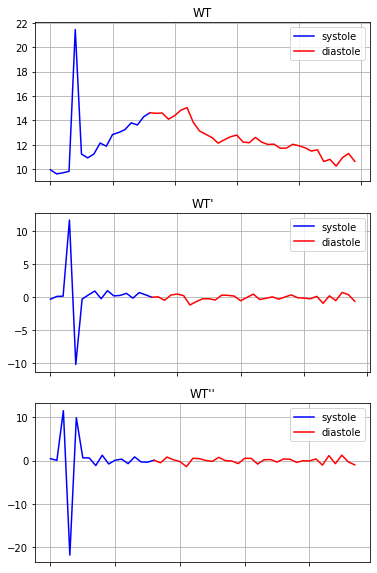

In [38]:
for i,j in zip(WTs,ES_Ids):
    plotWT(i,j)